<a href="https://colab.research.google.com/github/zLuisz03/Hands-on-Computer-Vision/blob/main/Sesion2_1_Demosaicking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Demosaicking](https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/0129bbd70539e5c601b76b03e4d3883f67c39e72/Sesiones/Sesion2/Images/poster_sesion2.png)

# üé® **Hands-on Sesi√≥n 2.1: Image Demosaicking** üèûÔ∏è

## üìå Introducci√≥n

**Demosaicking** (o de-mosaicing) es un algoritmo utilizado en el procesamiento de im√°genes digitales para reconstruir im√°genes a todo color a partir de datos incompletos obtenidos por un sensor de imagen con una matriz de filtros de color (CFA), como el filtro Bayer.

üì∑ **C√°maras digitales modernas** usan sensores con CFA, lo que hace que el demosaicking sea crucial para obtener im√°genes visibles y de alta calidad. Las im√°genes RAW permiten que este proceso se haga v√≠a software en vez del firmware de la c√°mara.


## üì∏ **Formatos de im√°genes RAW m√°s comunes**

| Extensi√≥n | Descripci√≥n                           | Extensi√≥n | Descripci√≥n                                |
|-----------|--------------------------------------|-----------|--------------------------------------------|
| .DNG      | Apple ProRAW Image                  | .ARW      | Sony Alpha Raw Digital Camera Image       |
| .CR2      | Canon Raw 2 Image File              | .SR2      | Sony RAW Image                            |
| .CR3      | Canon Raw 3 Image File              | .SRF      | Sony RAW Image                            |
| .CRW      | Canon Raw CIFF Image File           | .NEF      | Nikon Electronic Format RAW Image         |
| .CS1      | CaptureShop 1-shot Raw Image        | .NRW      | Nikon Raw Image                           |


## üîß Librer√≠as necesarias

In [1]:
%%capture
# @title librer√≠as

!pip install -q rawpy
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import rawpy
from scipy.ndimage import convolve

## üì• Descargando im√°genes RAW

Los raw disponibles son `raw.CR2`, `raw_Canon.CR2`, `raw_Canon2.CR2`, `raw_GOPRO1.dng`, `raw_GOPRO2.dng`, `raw_Nikon.NEF`.

In [2]:
# @title Seleeciona el archivo raw
raw_file = "raw.CR2"  # @param {type:"string"}

In [3]:
# @title descargar raw
raw_files = {
    "raw.CR2": "https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/raw.CR2",
    "raw_Canon.CR2": "https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/raw_Canon.CR2",
    "raw_Canon2.CR2": "https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/raw_Canon2.CR2",
    "raw_GOPRO1.dng": "https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/raw_GOPRO1.dng",
    "raw_GOPRO2.dng": "https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/raw_GOPRO2.dng",
    "raw_Nikon.NEF": "https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/raw_Nikon.NEF"
}

url = raw_files[raw_file]
!wget -O $raw_file $url

--2025-04-01 02:57:22--  https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/raw.CR2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10179236 (9.7M) [application/octet-stream]
Saving to: ‚Äòraw.CR2‚Äô

raw.CR2             100%[===================>]   9.71M  56.8MB/s    in 0.2s    

2025-04-01 02:57:23 (56.8 MB/s) - ‚Äòraw.CR2‚Äô saved [10179236/10179236]



## üñºÔ∏è **1. Probemos con una imagen**<a name="tema2"></a> üì∑

Vamos a leer y visualizar una imagen RAW.

üìñ Leyendo imagen .RAW ...
üìè Tama√±o de la imagen: (2622, 3948)


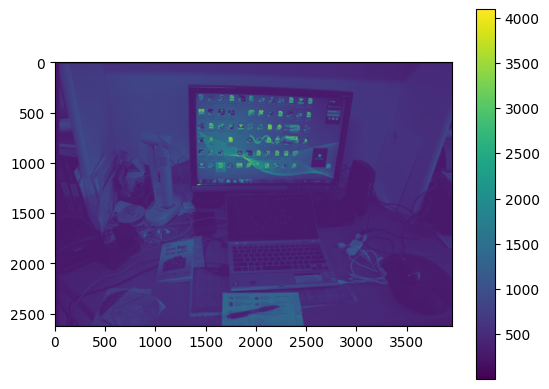

In [4]:
with rawpy.imread(raw_file) as raw:
    print('üìñ Leyendo imagen .RAW ...')
    image = raw.raw_image.copy()

print(f'üìè Tama√±o de la imagen: {image.shape}')
plt.imshow(image)
plt.colorbar()
plt.show()

üõ†Ô∏è **Ejercicio:** Selecciona y visualiza diferentes zonas de la imagen.

üîé Hagamos Zoom para ver el patr√≥n Bayer.

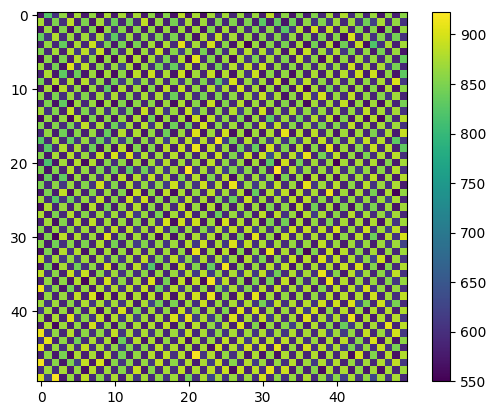

In [5]:
plt.imshow(image[250:300, 200:250]) # üõ†Ô∏è Cambia los valores para explorar otras regiones
plt.colorbar()
plt.show()

## üåà **2. Hagamos demosaicking** <a name="tema3"></a> üé®

**Objetivo:** Separar la imagen en sus canales RGB.

La funci√≥n `get_cfa_channel` debe devolver 0 en rojo, 1 en verde, y 2 en blue.
La funci√≥n `get_cfa_mask` debe devolver una matrix de tama√±o de la imagen original, donde cada valor corresponde a 0, 1 o 2

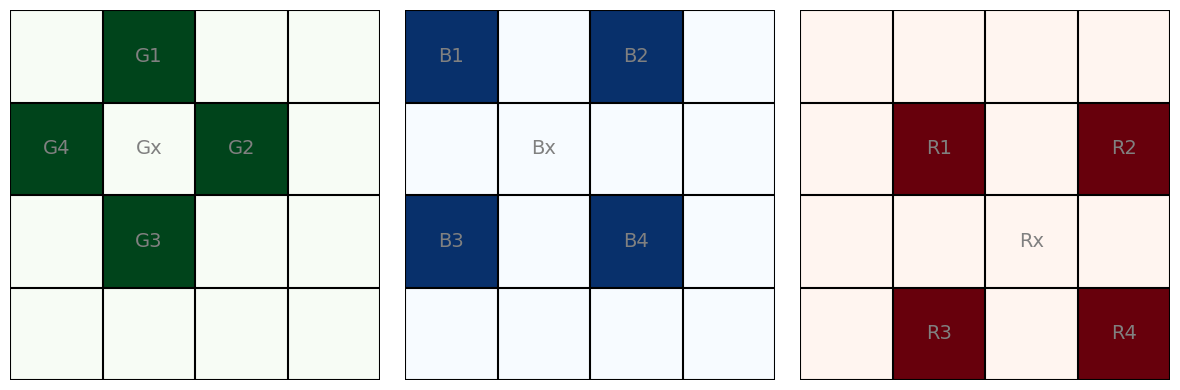

In [6]:
# @title interpolaci√≥n bilineal
import matplotlib.pyplot as plt
import numpy as np

# Crear matrices 4x4
green_matrix = np.zeros((4, 4))
blue_matrix = np.zeros((4, 4))
red_matrix = np.zeros((4, 4))

# Asignar unos donde corresponde
green_positions = [(0, 1), (1, 0), (1, 2), (2, 1)]
blue_positions = [(0, 0), (0, 2), (2, 0), (2, 2)]
red_positions = [(1, 1), (1, 3), (3, 1), (3, 3)]

for i, j in green_positions:
    green_matrix[i, j] = 1

for i, j in blue_positions:
    blue_matrix[i, j] = 1

for i, j in red_positions:
    red_matrix[i, j] = 1

# Etiquetas en cada celda
green_labels = {(0, 1): 'G1', (1, 0): 'G4', (1, 2): 'G2', (2, 1): 'G3', (1, 1): 'Gx'}
blue_labels = {(0, 0): 'B1', (0, 2): 'B2', (2, 0): 'B3', (2, 2): 'B4', (1, 1): 'Bx'}
red_labels = {(1, 1): 'R1', (1, 3): 'R2', (3, 1): 'R3', (3, 3): 'R4', (2, 2): 'Rx'}

# Funci√≥n para graficar la matriz con etiquetas y cuadr√≠cula
def plot_matrix(ax, matrix, cmap, labels):
    ax.imshow(matrix, cmap=cmap, vmin=0, vmax=1)

    # Agregar l√≠neas de la cuadr√≠cula
    for i in range(5):
        ax.plot([-0.5, 3.5], [i - 0.5, i - 0.5], color='black', linewidth=1.5)  # Horizontales
        ax.plot([i - 0.5, i - 0.5], [-0.5, 3.5], color='black', linewidth=1.5)  # Verticales

    # Agregar etiquetas
    for (i, j), text in labels.items():
        ax.text(j, i, text, ha='center', va='center', fontsize=14, color='gray')

    # Quitar ejes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

# Crear la figura
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Graficar cada matriz con sus etiquetas y cuadr√≠cula
plot_matrix(axes[0], green_matrix, 'Greens', green_labels)
plot_matrix(axes[1], blue_matrix, 'Blues', blue_labels)
plot_matrix(axes[2], red_matrix, 'Reds', red_labels)

plt.tight_layout()
plt.show()

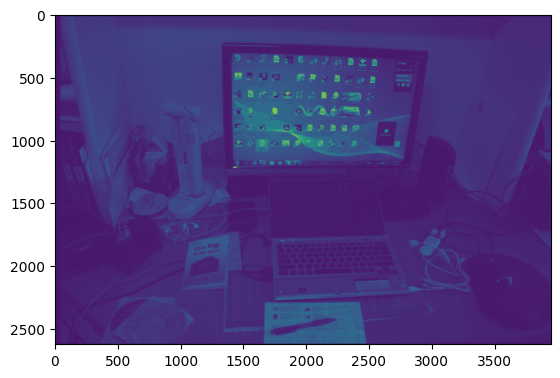

In [36]:
RED, GREEN, BLUE = 0, 1, 2


def get_cfa_channel(i, j):
    if i % 2 ==0:
      if j % 2 ==0:
        return 2
      else:
        return 1
    else:
      if j % 2 ==0:
         return 1
      else:
        return 0


def get_cfa_mask(shape):
    matrix = np.zeros(shape)
    for i in range(len(matrix)):
      for j in range(len(matrix[i])):
        matrix[i][j]=get_cfa_channel(i, j)
    return matrix

cfa_mask = get_cfa_mask(image.shape)

r_mask, g_mask, b_mask = (cfa_mask == RED), (cfa_mask == GREEN), (cfa_mask == BLUE)

r, g, b = image * r_mask, image * g_mask, image * b_mask

plt.imshow(r+g+b)
plt.show()

‚úÖ **Siguiente paso:** Completa los huecos en la imagen interpolando los valores faltantes.
Esta vez, vamos a utilizar convoluciones y sus kernel de convoluci√≥n.

In [8]:
# üèÜ Escribe aqu√≠ el c√≥digo para completar los valores faltantes:

#Filtro lineal para el canal verde
G_KERNEL = ...

#Filtro lineal para los canales azul y rojo (Note la diferencia)
RB_KERNEL = ...

r = convolve(r, RB_KERNEL, mode='nearest')
b = convolve(b, RB_KERNEL, mode='nearest')
g = convolve(g, G_KERNEL, mode='nearest')

channels = [r, g, b]
titles = ['Red Channel', 'Green Channel', 'Blue Channel']

for i, channel in enumerate(channels):
    plt.subplot(3, 2, 2*i + 1)
    plt.imshow(channel)
    plt.title(titles[i])
    plt.colorbar()

    plt.subplot(3, 2, 2*i + 2)
    plt.imshow(channel[310:410, 1405:1505])
    plt.title(f'{titles[i]} (Zoomed)')
    plt.colorbar()

plt.tight_layout()
plt.show()


TypeError: float() argument must be a string or a real number, not 'ellipsis'

---
## üéØ **3. Correcciones de color** <a name="tema4"></a> üåà

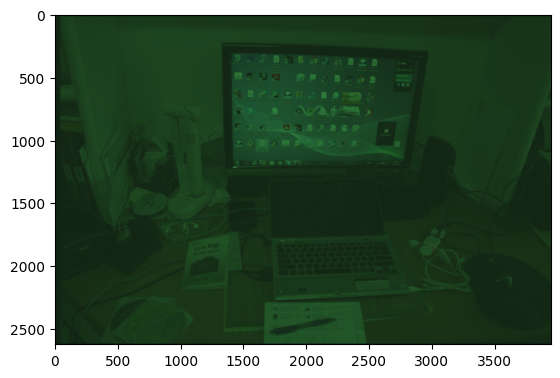

In [ ]:
# Definimos el valor de gamma para la correcci√≥n gamma
gamma = 2.2 # üõ†Ô∏è Puedes cambiar este valor para ver c√≥mo afecta a la imagen

# Apilamos los canales rojo, verde y azul para formar una imagen RGB
rgb = ...  # üõ†Ô∏è Completar la funci√≥n para apilar los canales

# # Normalizaci√≥n independiente por canal
min_val = np.min(rgb, axis=(0, 1))  # M√≠nimo por canal
max_val = np.max(rgb, axis=(0, 1))  # M√°ximo por canal

rgb = (rgb - min_val) / (max_val - min_val)  # Normalizaci√≥n Min-Max por canal

# Aplicamos la correcci√≥n gamma a la imagen RGB
rgb = (np.power(rgb, 1.0 / gamma) )

# Mostramos la imagen resultante
plt.imshow((rgb))
plt.show()

üîç **¬°Ahora puedes comparar con m√©todos avanzados de RAWPY!** üöÄ

Reading image raw data...


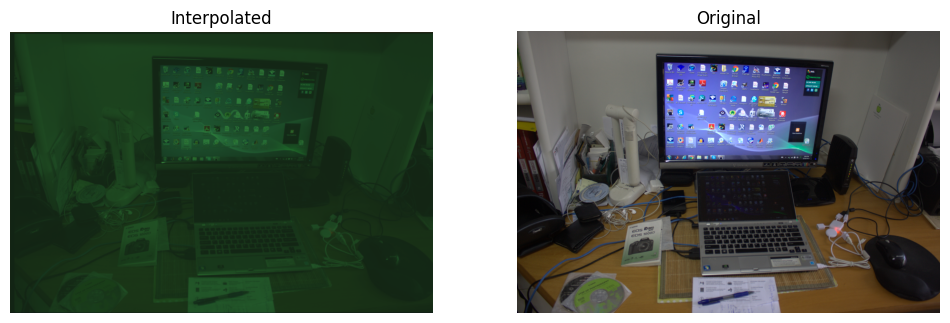

In [ ]:
# Comparando contra la imagen original
with rawpy.imread(raw_file) as raw:
    print('Reading image raw data...')
    rgb2 = raw.postprocess(use_camera_wb=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(rgb)
axes[0].set_title('Interpolated')
axes[0].axis('off')
axes[1].imshow(rgb2)
axes[1].set_title('Original')
axes[1].axis('off')
plt.show()